# Data Analysis with Python: Zero to Pandas 
https://jovian.ai/ankitsavita144/amazon-top-50-bestselling-books-2009-2019/v/12

## Step 1: Select a real-world dataset

In [518]:
import pandas as pd
import numpy as np 

## Step 2: Perform data preparation & cleaning

In [519]:
# Load the dataset into a data frame using Pandas
df = pd.read_csv('D:\\Python\\pandas\\Lesson_13\\vgsales.csv', index_col='Rank')
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


###  Explore the number of rows & columns, ranges of values etc.

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [521]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [522]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Handle missing, incorrect and invalid data

In [523]:
# show missing values per column:
df.isna().sum()


Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [524]:
# show missing data in Publisher column
df[df['Publisher'].isna()].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.0,0.41,3.00
1305,Triple Play 99,PS,NaN,Sports,NaN,0.81,0.55,0.0,0.10,1.46
1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.0,0.02,1.21
2224,Bentley's Hackpack,GBA,2005.0,Misc,NaN,0.67,0.25,0.0,0.02,0.93
3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004.0,Misc,NaN,0.46,0.17,0.0,0.01,0.64


In [525]:
# Fill all the None values in df.Publisher with Unknown (replace with inplace=True)

df['Publisher'].fillna(value="Unknown", inplace=True) 

In [526]:
df.isna().sum()    # check to see the change

Name              0
Platform          0
Year            271
Genre             0
Publisher         0
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

### Convert Year from float to date

In [527]:
# fill NaN with 0
df['Year'] = df['Year'].fillna(0)

In [528]:
# Convert the Year column to integer (to delete the decimal)
df.Year.astype(int)

Rank
1        2006
2        1985
3        2008
4        2009
5        1996
         ... 
16596    2002
16597    2003
16598    2008
16599    2010
16600    2003
Name: Year, Length: 16598, dtype: int32

In [529]:

df.Year = pd.to_datetime(df.Year, errors='coerce', format='%Y')    # If ‘coerce’, then invalid parsing will be set as NaT

In [530]:
# fill NaN with 0
df['Year'] = df['Year'].fillna(0)

In [531]:
df[df['Year']==0].head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
180,Madden NFL 2004,PS2,0,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
378,FIFA Soccer 2004,PS2,0,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
432,LEGO Batman: The Videogame,Wii,0,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
471,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,Unknown,1.57,1.02,0.00,0.41,3.00
608,Space Invaders,2600,0,Shooter,Atari,2.36,0.14,0.00,0.03,2.53


In [532]:
df.tail()     #TODO change Year to ONLY YEAR!!!!!

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002-01-01 00:00:00,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16597,Men in Black II: Alien Escape,GC,2003-01-01 00:00:00,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008-01-01 00:00:00,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16599,Know How 2,DS,2010-01-01 00:00:00,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16600,Spirits & Spells,GBA,2003-01-01 00:00:00,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [533]:
df.isna().sum()    # check to see the change

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [534]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.) 

In [542]:
# Compute the sum of all sales
df['Total_Sales'] = df.iloc[:, -5:-1].sum(axis=1)    
df = df.sort_values(by='Total_Sales', ascending=False)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Total_Sales
Rank,,,,,,,,,,,
1,Wii Sports,Wii,2006-01-01 00:00:00,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,123.99
3,Mario Kart Wii,Wii,2008-01-01 00:00:00,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,55.80
5,Pokemon Red/Pokemon Blue,GB,1996-01-01 00:00:00,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,51.48
2,Super Mario Bros.,NES,1985-01-01 00:00:00,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,51.40
4,Wii Sports Resort,Wii,2009-01-01 00:00:00,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,50.25


#### Wii Sports game is by far the game with the higher total sales (more than 2 folds from the second saled game )

# Step 3: Perform exploratory analysis & visualization

## Compute the mean, sum, range and other interesting statistics for numeric columns

In [539]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Total_Sales'],
      dtype='object')

In [545]:
genre_grouped = df.groupby('Genre')['Total_Sales'].sum()
genre_grouped = genre_grouped.sort_values(ascending=False)
genre_grouped

Genre
Action          2623.51
Sports          1978.12
Role-Playing    1527.35
Shooter         1491.61
Platform        1215.36
Misc            1209.02
Racing          1104.39
Fighting         674.26
Simulation       600.80
Adventure        372.05
Puzzle           365.59
Strategy         281.28
Name: Total_Sales, dtype: float64

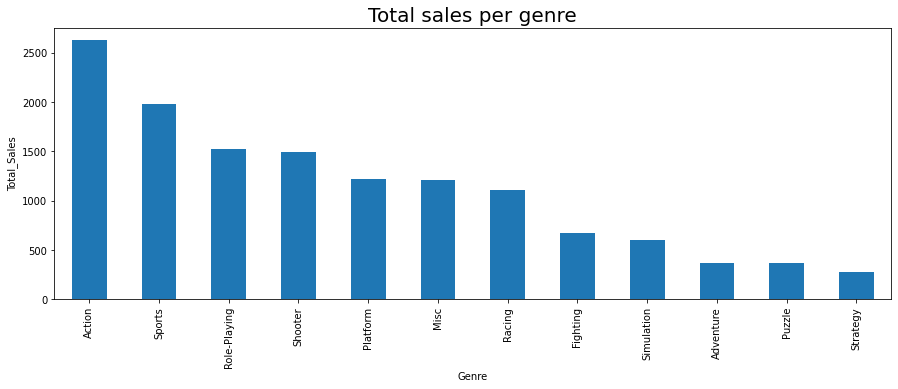

In [555]:
plt.figure(figsize=(15, 5))                                    # dimentions of the figure
genre_grouped.plot.bar()
plt.title('Total sales per genre', fontsize=20)
plt.xlabel('Genre')
plt.ylabel('Total_Sales')
plt.show()


###  Action\Adventure\Rol-playing\Shooter games had the highest sales

In [564]:
publisher_grouped = df.groupby(['Publisher'])['Total_Sales'].sum()
publisher_grouped = publisher_grouped.sort_values(ascending=False).head(15)
publisher_grouped

Publisher
Nintendo                                  2756.05
Electronic Arts                           1625.40
Activision                                1024.87
Sony Computer Entertainment                949.77
Ubisoft                                    695.80
Take-Two Interactive                       578.75
Konami Digital Entertainment               474.94
THQ                                        472.65
Namco Bandai Games                         438.48
Sega                                       436.54
Microsoft Game Studios                     336.22
Capcom                                     323.03
Square Enix                                241.77
Warner Bros. Interactive Entertainment     226.61
Atari                                      204.06
Name: Total_Sales, dtype: float64

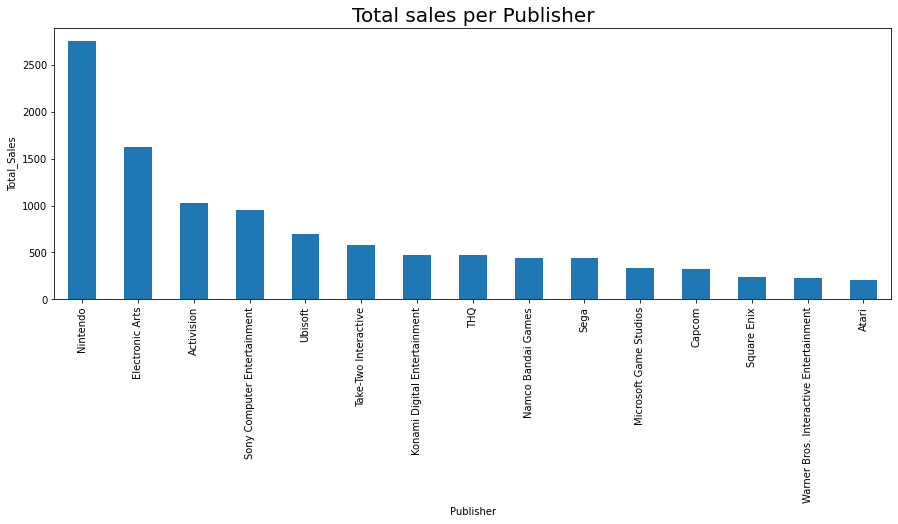

In [566]:
plt.figure(figsize=(15, 5))                                    # dimentions of the figure
publisher_grouped.plot.bar()
plt.title('Total sales per Publisher', fontsize=20)
plt.xlabel('Publisher')
plt.ylabel('Total_Sales')
plt.show()

#### Nintendo Has the higher sales with EA, Activision and SONY after it

In [601]:
# What are the platform that sales the most for nintendo?
pp_grouped = df.groupby(['Publisher', 'Platform'])['Total_Sales'].sum()
pp_grouped[['Nintendo']].sort_values(ascending=False)


Publisher  Platform
Nintendo   Wii         598.91
           DS          580.92
           GB          348.51
           NES         261.62
           3DS         260.15
           N64         184.57
           GBA         171.38
           SNES        148.52
           GC          111.73
           WiiU         89.74
Name: Total_Sales, dtype: float64

In [583]:

best_platform = df.groupby("Platform")['Total_Sales'].sum()
best_platform = best_platform.sort_values(ascending=False)    # Sort the data according to Total_Sales
best_platform.head(30)

Platform
PS2     1927.57
PS3     1523.47
X360    1358.51
Wii     1345.05
DS      1253.24
PS      1124.99
PSP      483.51
PS4      459.46
GBA      448.81
PC       423.53
3DS      415.96
GB       396.59
NES      376.18
SNES     338.86
XB       329.31
N64      298.54
GC       264.83
XOne     198.97
WiiU     125.33
PSV      107.67
2600     103.46
SAT       66.46
GEN       37.44
DC        26.49
NG         2.88
WS         2.84
SCD        2.73
TG16       0.32
3DO        0.20
GG         0.08
Name: Total_Sales, dtype: float64

#### sum up rows in a dataframe and add the values as a new row

In [596]:
#df.set_index('Platform')
PS_total = best_platform.loc[['PS', 'PS2', 'PS3', 'PS4']].sum()     # Sum all sales for Playstation
best_platform['PS_total']=PS_total                                  # add a new row for playstation games
best_platform = best_platform.sort_values(ascending=False)    # Sort the data according to Total_Sales
best_platform.head()

Platform
PS_total    5035.49
PS2         1927.57
PS3         1523.47
X360        1358.51
Wii         1345.05
Name: Total_Sales, dtype: float64

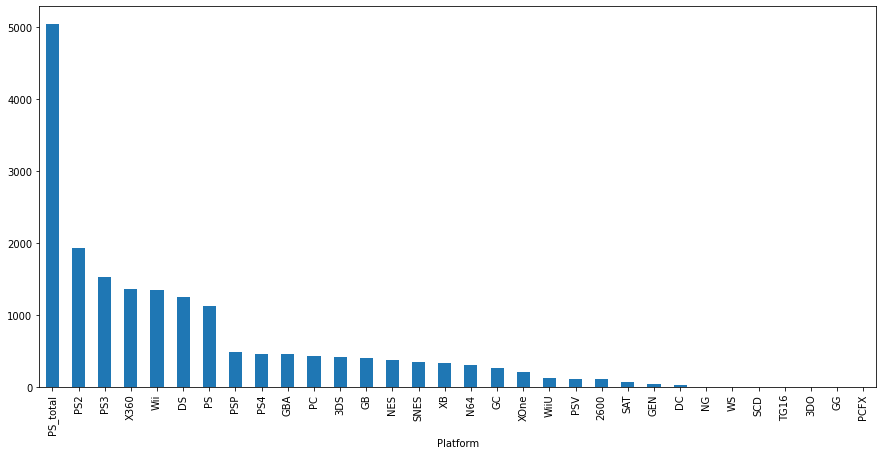

In [597]:
plt.figure(figsize=(15,7))
best_platform.plot.bar()
plt.show()

### Games for Playstation had the highest sales 

In [603]:

pp_grouped[['Electronic Arts']].sort_values(ascending=False)

Publisher        Platform
Electronic Arts  PS2         372.81
                 PS3         267.74
                 X360        252.34
                 PS          126.83
                 PC          113.88
                 PS4          93.01
                 Wii          89.48
                 XB           74.33
                 PSP          59.37
                 DS           47.20
                 XOne         42.24
                 GC           34.85
                 GBA          18.99
                 N64          16.54
                 PSV           6.74
                 3DS           4.50
                 GB            2.52
                 WiiU          1.87
                 SAT           0.16
Name: Total_Sales, dtype: float64